# System Path & Modules

# Main Script

## Interpolate Original Data to Target Grid

Do everything for only one Dataset

### Load Original Data

In [6]:
#---
# Modules
#---
from eddies.data import data_loader
from eddies.grid import FESOM_grid
from eddies.grid import grid_transformer

#---------
# Original Data
#---------
path = path_to_your_data
grid = load_your_grid
xx0, yy0 = grid.elem_x, grid.elem_y # Original grid-coordinates

(u, udis, v, vdis) = data_loader.load_original_data(path) # Element-Structure

#---------
# Transform to matrix structure
#---------
u_matrix    = grid_transformer.elem_to_matrix(u, yy0)
v_matrix    = grid_transformer.elem_to_matrix(v, yy0)
udis_matrix = grid_transformer.elem_to_matrix(udis, yy0)
vdis_matrix = grid_transformer.elem_to_matrix(vdis, yy0)

What scheme (GAMB, EASY4)?gamb


### Load Interpolated Values from Disk

In [5]:
#---
# Modules
#---
from eddies.interpolation import interpolation_tools
from eddies.interpolation import interpolation_tools
from eddies.figures import plotter

#---
# Load interpolated data
# Make sure it is the same year as original data
#---

method = 'linear'
filled = 'filled_boarders'
f1 = '../resources/interpolated_data/u'   + '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled  
f2 = '../resources/interpolated_data/udis'+ '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled
f3 = '../resources/interpolated_data/v'   + '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled
f4 = '../resources/interpolated_data/vdis'+ '_' + scheme + '_' + str(year) + '_0c01_0c01_0c0083_0c0263_' + method + '_' + filled
u_int    = np.load(f1 + '.npy')
udis_int = np.load(f2 + '.npy')
v_int    = np.load(f3 + '.npy')
vdis_int = np.load(f4 + '.npy')

#- Parameters of interpolated data
days = u_int.shape[0]
ny   = u_int.shape[1]
nx   = u_int.shape[2]
nz   = u_int.shape[3]

#- Fill boarders
u_int    = interpolation_tools.fill_boarders(u_int)
v_int    = interpolation_tools.fill_boarders(v_int)
udis_int = interpolation_tools.fill_boarders(udis_int)
vdis_int = interpolation_tools.fill_boarders(vdis_int)

#- Cut NaN Values out
u_int    = interpolation_tools.cut_boarders(u_int)
v_int    = interpolation_tools.cut_boarders(v_int)
udis_int = interpolation_tools.cut_boarders(udis_int)
vdis_int = interpolation_tools.cut_boarders(vdis_int)

#- Apply Hanning Window if necessary
is_hw = False
if is_hw: 
    u_int    = interpolation_tools.apply_hanning_window(u_int   , axis=1)
    v_int    = interpolation_tools.apply_hanning_window(v_int   , axis=1)
    udis_int = interpolation_tools.apply_hanning_window(udis_int, axis=1)
    vdis_int = interpolation_tools.apply_hanning_window(vdis_int, axis=1)

### Plot Original and Interpolated Grid

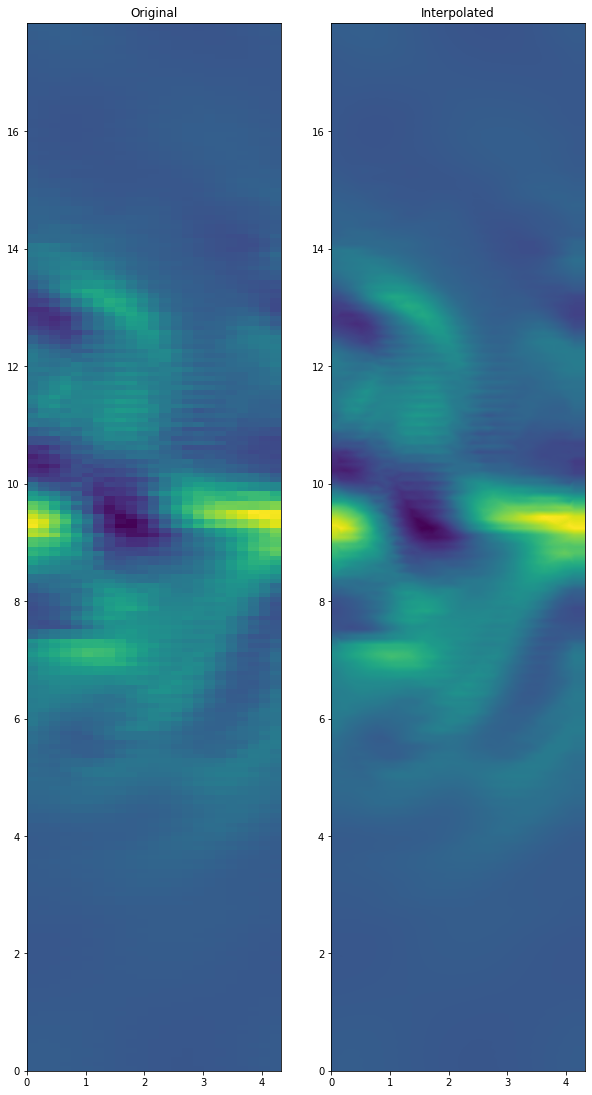

In [9]:
day = 1
lvl = 0
fig1 = plotter.compare_original_interpolated(u_matrix[:,:,:-1,:], u_int, day, lvl, xx, yy) # Last row omitted in interpolation.

## Plot collapsed spectra of 2D-FFT

In [7]:
#- Load collapsed 2D-Spectra
folder = '../resources/collapsed_2D_spectra/'
method = 'nearest'
filled = True
path1  = 'collapsed2D_DIS_Gamb_1949_0c01_0c01_0c0669_0c013_'
path2  = 'collapsed2D_KE_Gamb_1949_0c01_0c01_0c0669_0c013_'
if filled == True:
    dis1    = np.load(folder + path1 + method + '_' + 'filled_boarders.npy') # shape: (days, dis, nz)
    ke1     = np.load(folder + path2 + method + '_' + 'filled_boarders.npy')
    dis2    = np.load(folder + path1 + method + '_' + 'filled_boarders.npy') 
    ke2     = np.load(folder + path2 + method + '_' + 'filled_boarders.npy')
else:
    dis1    = np.load(folder + path1 + method + '.npy') # shape: (days, dis, nz)
    ke1     = np.load(folder + path2 + method + '.npy')
    dis2    = np.load(folder + path1 + method + '.npy') 
    ke2     = np.load(folder + path2 + method + '.npy')

<ipython-input-8-02204cb592d6>:29: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
<ipython-input-8-02204cb592d6>:30: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)
<ipython-input-8-02204cb592d6>:41: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
<ipython-input-8-02204cb592d6>:42: RuntimeWarning: divide by zero encountered in power
  ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)


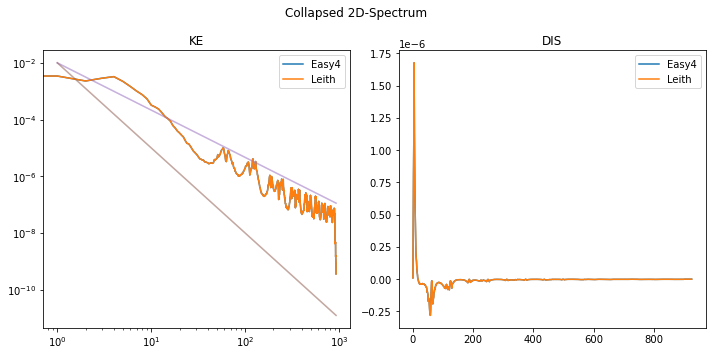

In [8]:
#------------
# Settings
#------------
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
day    = 0
nz     = 0

#------------
# Plot
#------------

#- Values: Skipping k=0
y1 = np.mean(ke1,  axis=(0,2))[:] #- Scheme1
y2 = np.mean(dis1, axis=(0,2))[:]
y3 = np.mean(ke2,  axis=(0,2))[:] #- Scheme2
y4 = np.mean(dis2, axis=(0,2))[:]
xx = np.arange(len(y1))

#- Figure Settings
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Collapsed 2D-Spectrum')

#-----------
# Scheme1
#-----------
#- Kinetic Energy
ax[0].plot(xx, y1, linestyle= '-', color=colors[0], label='Easy4')
ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)


#- Dissipation
ax[1].plot(xx, y2, linestyle= '-',  color=colors[0], label='Easy4')

#-----------
# Scheme2
#-----------
#- Kinetic Energy
ax[0].plot(xx, y3, linestyle= '-', color=colors[1], label='Leith')
ax[0].plot(xx, xx**-(5/3) / 10**2, color=colors[4], alpha=.3)
ax[0].plot(xx, xx**-(3.0) / 10**2, color=colors[5], alpha=.3)


#- Dissipation
ax[1].plot(xx, y4, linestyle= '-',  color=colors[1], label='Leith')

#- Axis settings
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('KE')

ax[1].legend()
ax[1].set_title('DIS')

#- Show Figures
fig.tight_layout()
fig.show()

## Plot Comparison of Total KE & DIS

In [20]:
#---
# Modules
#---
import matplotlib.pyplot as plt
from eddies.tests import examples
from eddies.data import data_loader
from eddies.data import data_manager
from eddies.diagnostics import energetics
from eddies.figures import plotter
import numpy as np

#- Load Original data
scheme   = 'Leith'
path     = path_to_your_modelrun
year     = '1950'
nz       = 0
(u, udis, v, vdis) = data_loader.load_original_data(path, year) # Element-Structure

#- Calculate total energetics of original data
dis_orig = energetics.total_dis_orig(u, udis, v, vdis)
ke_orig  = energetics.total_ke_orig(u, v)
dis_orig = dis_orig[nz]
ke_orig  = ke_orig[nz]

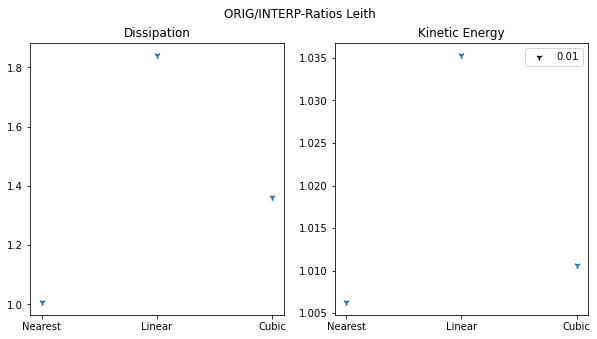

In [21]:
#- Grid001
#-- Load total energetics for all starting values
f_ke  = 'total_energetics_ke_interp_Leith_1950_0c01_0c01_0c0083_0c0263' 
f_dis = 'total_energetics_dis_interp_Leith_1950_0c01_0c01_0c0083_0c0263'

dis_interp1, ke_interp1 = data_loader.load_interpolated_total_energetics(f_dis, f_ke, filled=True) #- Starting value 1
dis_interp2, ke_interp2 = data_loader.load_interpolated_total_energetics(f_dis, f_ke, filled=True) # Starting value 2 (Example)

#-- Calculate Ratios
ke_interp  = np.concatenate((ke_interp1, 1.0 * ke_interp2,)) # 1.1 as an example if I have different starting values
dis_interp = np.concatenate((dis_interp1, 1.0* dis_interp2,))
ke_ratios  = ke_orig  / ke_interp
dis_ratios = dis_orig / dis_interp

#-- Save ratios in dictionary
dict001 = data_manager.create_gridspacing_dict(dis_ratios, ke_ratios)

#- Grid009
#-- Calculate ratios
#-- Save ratios in dictionary
                            
#- Create dictionary containing all gridspacings
dictionaries  = [dict001,]
grid_spacings = np.array([0.01,])
energy_ratios = data_manager.create_energyratios_dict(dictionaries, grid_spacings)

#- Scatter plot ratios
fig = plotter.scatter_energy_ratios(energy_ratios, scheme)

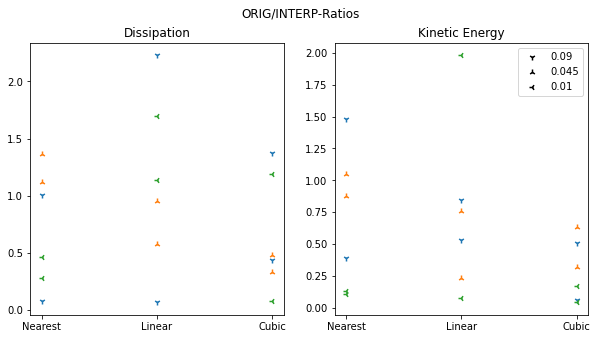

In [15]:
#- Example of scatter plots based on random data. Check this in order to know how to create one.
examples.scatter_plot_ratios()

## Plot collpased 2D spectra

In [2]:
year = '1951'
schemes = [#'GAMB_1',
           'GAMB_3',
           #'GAMB_7',
           #'GAMB_8',
            'GAM4_1', 
            'GAM3_1', 
#            'GAM3_4', 
#            'GAM2_1', 
#            'GAM2_4', 
#            'GAM1_3',
          ]

start_values  = ['_0c01_0c01_0c0669_0c013_',
                ]

dis_paths     = []
ke_paths      = []

for scheme in schemes:
    dis_paths.append('collapsed2D_DIS_' + scheme + '_' + year + start_values[0])
    ke_paths.append('collapsed2D_KE_'   + scheme + '_' + year + start_values[0])

In [3]:
#- Load collapsed 2D-Spectra
folder = '../resources/collapsed_2D_spectra/'
method = 'nearest'
filled = True
dis = []
ke  = []

for path in dis_paths:
    if filled == True:
        dis.append(np.load(folder + path + method + '_' + 'filled_boarders.npy')) # shape: (days, dis, nz)
    else:
        dis.append(np.load(folder + 'collapsed2D_DIS_' + path + method + '.npy'))
        
for path in ke_paths:
    if filled == True:
        ke.append(np.load(folder + path + method + '_' + 'filled_boarders.npy')) # shape: (days, dis, nz)
    else:
        ke.append(np.load(folder + 'collapsed2D_DIS_' + path + method + '.npy'))
        
dis = np.array(dis)
ke  = np.array(ke)

In [5]:
#- Get labels for xaxis
def find_nearest_idx(array, value):
    """
    Finds nearest index to a value in given array
    """
    array = np.asarray(array)
    idx   = (np.abs(array - value)).argmin()
    return idx

n  = len(ke[0][0, :, 0]) # Amount of Wavenubmrs
d  = 0.01 # Gridspacing of interpolation
T  = 1 / np.fft.fftfreq(n, d)[1:] # Wavelength
T  = np.insert(T, 0, np.fft.fftfreq(n, d)[0]) # DC-component

if n % 2 == 0:
    Nf = np.abs(T[n//2])
else:
    Nf = np.abs(T[n//2-1])

Tmax_channel  = 4.32 # Original channel width
Tmin_channel  = 0.31 # Maximum resolution in original channel #- Need to specify this by calculations in paper
Tmin_methodC  = 2 * 0.09 # Maximum resolution for method AB
Tmin_methodAB = 2 * Tmin_methodC # Max resolution for method C

kmin_channel  = find_nearest_idx(T, Tmax_channel) 
kmax_channel  = find_nearest_idx(T, Tmin_channel) 
kmax_methodC  = find_nearest_idx(T, Tmin_methodC) 
kmax_methodAB = find_nearest_idx(T, Tmin_methodAB) 

In [6]:
# Choose certain ticks
xticklabels = np.round(np.abs(T), decimals=2).astype(str).tolist() # Absolute value for NF. We neglect negative WN anyways

xticks      = [1, 
              kmin_channel, 
              kmax_methodAB, 
              kmax_channel, 
              kmax_methodC, 
              n//2,
             ]

xticklabels = [xticklabels[xtick] for xtick in xticks]

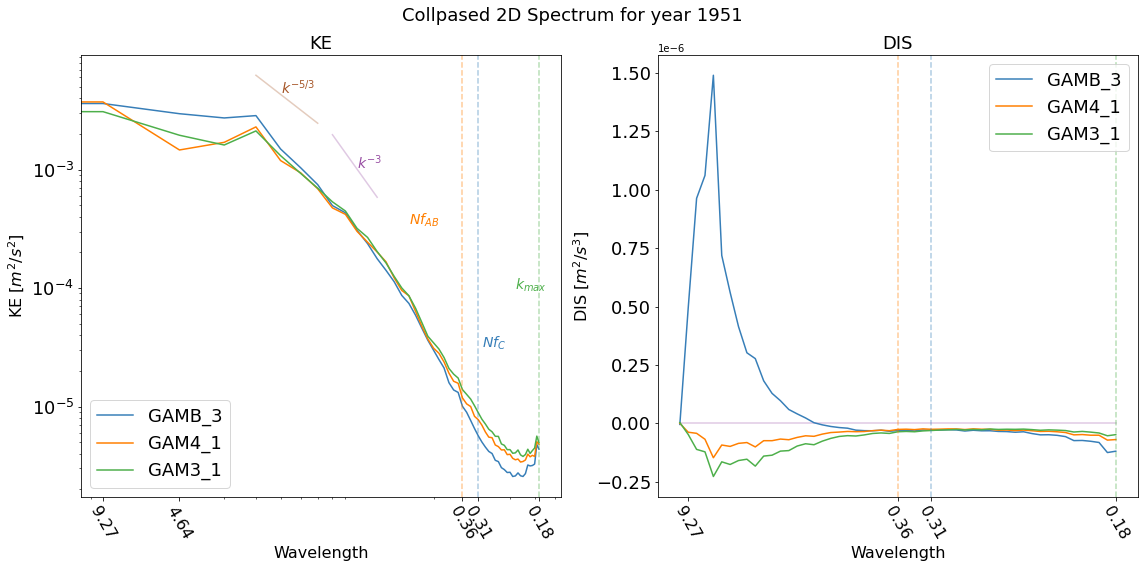

In [89]:
#------------
# Settings
#------------
import matplotlib.pyplot as plt

colors = ['#377eb8', 
          '#ff7f00', 
          '#4daf4a', 
          '#f781bf', 
          '#a65628', 
          '#984ea3',
          '#999999', 
          '#e41a1c', 
          '#dede00',
         ]
day    = 0
nz     = 0
xx1    = np.arange(n // 2)
xx2    = xx1[:kmax_methodC + 1]

#------------
# Plot
#------------

#- Figure Settings
title_fontsize = 18
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
fig.suptitle(f'Collpased 2D Spectrum for year {year}', fontsize=title_fontsize)

#- Kolmogorov Reference
s1 = 4
s2 = s1 + 4
s3 = s2 + 5
scale =  (xx1[s2] ** (-5/3) / 10 ** 1.2) / (xx1[s2] ** (-3.0))
ax[0].plot(xx1[s1:s2], xx1[s1:s2] ** (-5/3) / 10 ** 1.2, color=colors[4], alpha=.3) # Reference lines
ax[0].plot(xx1[s2:s3], xx1[s2:s3] ** (-3.0) * scale, color=colors[5], alpha=.3)

#-- Text for Kolmogorov Reference
mxk53 = int(np.median(xx1[s1:s2]))
mxk30 = int(np.median(xx1[s2:s3]))
ax[0].text(x=mxk53, y=mxk53 ** (-5/3) / 10 ** 1.2, s='$k^{-5/3}$', fontsize='14', color=colors[4])
ax[0].text(x=mxk30, y=mxk30 ** (-3.0) * scale, s='$k^{-3}$',   fontsize='14', color=colors[5])

#- Zero-Crossing for Dissipation
ax[1].plot(xx2, xx2 * 0, color=colors[5], alpha=.3)

#- Values: Skipping k=0
for i, scheme in enumerate(schemes):
    y1 = np.mean(ke[i],  axis=(0,2))[:n//2] #- Scheme1
    y2 = np.mean(dis[i], axis=(0,2))[:n//2]
    
    yy1 = y1[:kmax_methodC+1] # Plot up to max wavenumber of method C
    yy2 = y2[:kmax_methodC+1]
    
    #- Kinetic Energy
    ax[0].plot(xx2, yy1, linestyle= '-', color=colors[i], label=scheme)
    ax[1].plot(xx2, yy2, linestyle= '-', color=colors[i], label=scheme)
    
    #- Axis settings & Legend
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].legend(fontsize=title_fontsize)
    ax[0].set_title('KE', fontsize=title_fontsize)
    ax[1].legend(fontsize=title_fontsize)
    ax[1].set_title('DIS', fontsize=title_fontsize)
    
    #- Ticks KE
    ax[0].set_xticks(xticks[:-1], minor=False)
    ax[0].set_xticklabels(xticklabels[:-1], fontsize=16, rotation=-60)
    ax[0].yaxis.set_tick_params(labelsize=18)
    
    #-- Readjust ticks
    xtick_dis      = xticks[2:]
    xtick_dislabel = xticklabels[2:]
    xtick_dis.insert(0, xticks[0])
    xtick_dislabel.insert(0, xticklabels[0])
    
    #- Ticks DIS
    ax[1].set_xticks(xtick_dis[0:-1], minor=False)
    ax[1].set_xticklabels(xtick_dislabel[0:-1], fontsize=16, rotation=-60)
    ax[1].yaxis.set_tick_params(labelsize=18)  

#- Vertical lines
ax[0].axvline(x=xticks[2],  alpha=0.4, color=colors[1],  linestyle='--', label='NfAB') #- kmax_methodAB
ax[0].axvline(x=xticks[3],  alpha=0.4, color=colors[0],  linestyle='--', label='kmax') #- kmax channel
ax[0].axvline(x=xticks[4],  alpha=0.4, color=colors[2],  linestyle='--', label='NfC') #- kmax_methodC

ax[1].axvline(x=xticks[2],  alpha=0.4, color=colors[1],  linestyle='--', label='NfAB') #- kmax_methodAB
ax[1].axvline(x=xticks[3],  alpha=0.4, color=colors[0],  linestyle='--', label='kmax') #- kmax channel
ax[1].axvline(x=xticks[4],  alpha=0.4, color=colors[2],  linestyle='--', label='NfC') #- kmax_methodC

#-- Text for vertical lines
#--- KE
spacing = 10
align_y = 4
ax[0].text(x = xticks[2] - spacing, 
           y = align_y * yy1[xticks[2] - spacing], 
           s = '$Nf_{AB}$',  
           fontsize = '14', 
           color = colors[1],
          )
ax[0].text(x = xticks[3] + spacing // 10, 
           y = align_y * yy1[xticks[3] + spacing//10], 
           s = '$Nf_C$',     
           fontsize = '14', 
           color = colors[0],
          )
ax[0].text(x = xticks[4] - spacing,
           y = 6 * align_y * yy1[xticks[4] - spacing], 
           s = '$k_{max}$',  
           fontsize = '14', 
           color = colors[2],
          )

#- Axis settings
ax[0].set_xlabel('Wavelength', fontsize=16)
ax[1].set_xlabel('Wavelength', fontsize=16)
ax[0].set_ylabel('KE [$m^2/s^2$]', fontsize=16)
ax[1].set_ylabel('DIS [$m^2/s^3$]', fontsize=16)
#- Show Figures
fig.tight_layout()
fig.show()

### Boxplot 

In [4]:
#---
# Modules
#---
import matplotlib.pyplot as plt
from eddies.tests import examples
from eddies.data import data_loader
from eddies.data import data_manager
from eddies.diagnostics import energetics
from eddies.figures import plotter
import numpy as np

In [5]:
#- Load Original data
scheme   = 'Leith'
path     = path_to_your_data
year     = '1950'
nz       = 0
(u, udis, v, vdis) = data_loader.load_original_data(path, year) # Element-Structure

#- Calculate total energetics of original data
dis_orig = energetics.total_dis_orig(u, udis, v, vdis)
ke_orig  = energetics.total_ke_orig(u, v)
dis_orig = dis_orig[nz]
ke_orig  = ke_orig[nz]

What scheme (GAMB, EASY4)?easy4
Load 2d part of the grid in 0 second(s)


In [6]:
#- Grid001
#-- Load total energetics for all starting values
f_ke  = 'total_energetics_ke_interp_Leith_1950_0c01_0c01_0c0083_0c0263' 
f_dis = 'total_energetics_dis_interp_Leith_1950_0c01_0c01_0c0083_0c0263'

dis_interp1, ke_interp1 = data_loader.load_interpolated_total_energetics(f_dis, f_ke, filled=True) #- Starting value 1
dis_interp2, ke_interp2 = data_loader.load_interpolated_total_energetics(f_dis, f_ke, filled=True) # Starting value 2 (Example)

#-- Calculate Ratios
ke_interp  = np.concatenate((ke_interp1, 1.0 * ke_interp2,)) # 1.1 as an example if I have different starting values
dis_interp = np.concatenate((dis_interp1, 1.0* dis_interp2,))
ke_ratios  = ke_orig  / ke_interp
dis_ratios = dis_orig / dis_interp

#-- Save ratios in dictionary
dict001 = data_manager.create_gridspacing_dict(dis_ratios, ke_ratios)

#- Grid009
#-- Calculate ratios
#-- Save ratios in dictionary
                            
#- Create dictionary containing all gridspacings
dictionaries  = [dict001,]
grid_spacings = np.array([0.01,])
energy_ratios1 = data_manager.create_energyratios_dict(dictionaries, grid_spacings)

In [108]:
def boxplot_energy_ratios(energy_ratios, type_):
    #- Modules
    import numpy as np
    import matplotlib.pyplot as plt
    
    #- Helping function
    def box_plot(data, position, edge_color, fill_color):
        """
        Returns values for boxplots
        """
    
        bp = ax.boxplot(data, positions=position, patch_artist=True)

        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color=edge_color)

        for patch in bp['boxes']:
            patch.set(facecolor=fill_color)       

        return bp
    
    #- Parameters
    colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00',]
    n_methods = 3 # Nearest, Linear, Cubic
    
    grid_spacings = []
    for grid_spacing in energy_ratios.keys(): 
        grid_spacings.append(grid_spacing)
    
    positions = []
    for i in range(len(grid_spacings)):
        v = np.array([1, 5, 9]) # Positions of Plot
#         v = v + i * (n_methods + 1)
        v = v + i * 1
        
        positions.append(v)
        
    positions = np.array(positions) # Matrix form of positions
        
    #- Select Data
    fig, ax = plt.subplots() # Canvas
    bps = [] # Boxplots
    for i, grid in enumerate(grid_spacings):
        data = []
        data.append(energy_ratios[grid][type_][::3])  # Nearest
        data.append(energy_ratios[grid][type_][1::3]) # Linear   
        data.append(energy_ratios[grid][type_][2::3]) # Cubic 
        
        print(positions, data)
        bp = box_plot(data, positions[i], colors[i], colors[i+2])
        bps.append(bp)
        
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    # Horizontal grid to read numbers
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.3)
    ax.axvline(x=4, alpha=0.3, c='black')
    ax.axvline(x=8, alpha=0.3, c='black')
    
    # X-Ticks
    ax.set_xticks(ticks=(2,6,10,))
    ax.set_xticklabels(('Nearest','Linear','Cubic',))
    
    # Legend  
    ax.legend([bp['boxes'][0] for bp in bps], [grid_spacing for grid_spacing in grid_spacings], loc='upper right')
    
    fig.suptitle(f'{type_}: ORIG / INTERP Ratios')
    
    return fig

In [1]:
from eddies.tests import examples

energy_ratios = examples.scatter_plot_ratios()

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]] [array([0.35743654, 1.00418455]), array([1.98175629, 1.18445586]), array([1.10451596, 0.02207523])]
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]] [array([1.33838211, 0.88787772]), array([0.61328553, 0.00773562]), array([1.81942383, 1.89799701])]
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]] [array([1.25685063, 0.2201115 ]), array([0.24247824, 0.0798929 ]), array([1.79462294, 0.17277876])]


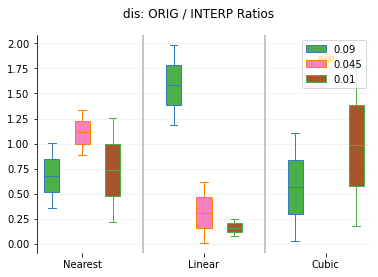

In [113]:
fig = boxplot_energy_ratios(energy_ratios, type_='dis')

In [114]:
print(energy_ratios)
print(energy_ratios1)

{'0.09': {'dis': array([0.35743654, 1.98175629, 1.10451596, 1.00418455, 1.18445586,
       0.02207523]), 'ke': array([1.80483483, 2.99979449, 1.1689415 , 0.42715826, 0.45927846,
       1.59031768])}, '0.045': {'dis': array([1.33838211, 0.61328553, 1.81942383, 0.88787772, 0.00773562,
       1.89799701]), 'ke': array([1.21776277, 1.53129079, 0.79647772, 0.56860144, 0.64684509,
       1.09055649])}, '0.01': {'dis': array([1.25685063, 0.24247824, 1.79462294, 0.2201115 , 0.0798929 ,
       0.17277876]), 'ke': array([1.51999287, 0.4257539 , 0.80438922, 0.9890341 , 0.42989567,
       0.98034397])}}
{'0.01': {'dis': array([1.00639704, 1.84033165, 1.36254939, 1.00639704, 1.84033165,
       1.36254939]), 'ke': array([1.00627199, 1.03529795, 1.01068018, 1.00627199, 1.03529795,
       1.01068018])}}
